# 

In [97]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score, accuracy_score,  make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import math

In [3]:
train_data = np.load('fashion_train.npy')
test_data = np.load('fashion_test.npy')

In [11]:
#first picture in the training data
curr_img = np.reshape(train_data[0][:-1], (28,28))
#plt.imshow(curr_img, cmap='grey');

In [5]:
pic1 = train_data[0]

In [12]:
#pic1 = Image.fromarray(pic1)

# PCA Dimensionality Reduction

> Below code for PCA is an implementation from DataCamp.com on 'Principal Component Analysis (PCA) in Python Tutorial'

In [13]:
train_df = pd.DataFrame(train_data)
# train_df.iloc[:,-1]
train_df.iloc[:,-1].replace(0, 'Top',inplace=True)
train_df.iloc[:,-1].replace(1, 'Trouser',inplace=True)
train_df.iloc[:,-1].replace(2, 'Pullover',inplace=True)
train_df.iloc[:,-1].replace(3, 'Dress',inplace=True)
train_df.iloc[:,-1].replace(4, 'Shirt',inplace=True)

In [14]:
x = train_df.loc[:, :783].values
x = preprocessing.StandardScaler().fit_transform(x)
x.shape

(10000, 784)

In [15]:
pca = decomposition.PCA()
pca_train = pca.fit_transform(x)

In [16]:
labels = ['PC' + str(a) for a in range(1, len(pca_train[0])+1)]
pca_df = pd.DataFrame(pca_train, columns = labels)

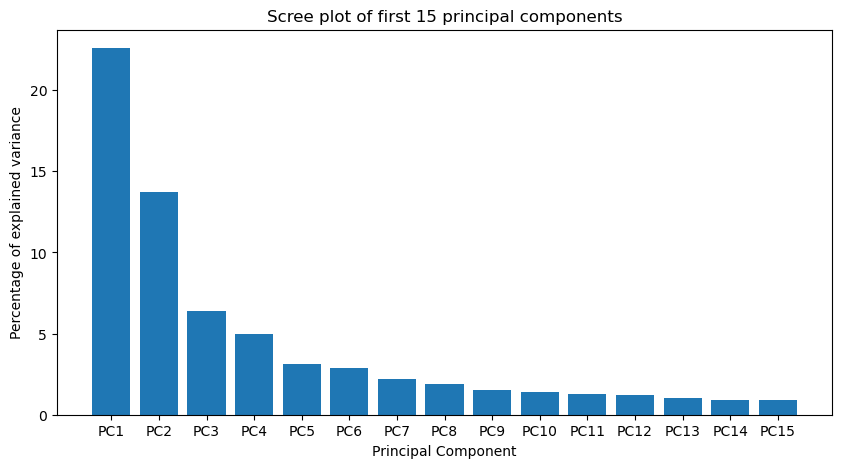

In [17]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
plt.figure(figsize=(10,5))
plt.bar(x=range(1, 16), height = per_var[:15], tick_label=labels[:15])
plt.xlabel('Principal Component')
plt.ylabel('Percentage of explained variance')
plt.title('Scree plot of first 15 principal components')
plt.show()

In [18]:
print('Explained variation per first two principal components: {}'.format(per_var[0:2]))

Explained variation per first two principal components: [22.6 13.7]


<Figure size 640x480 with 0 Axes>

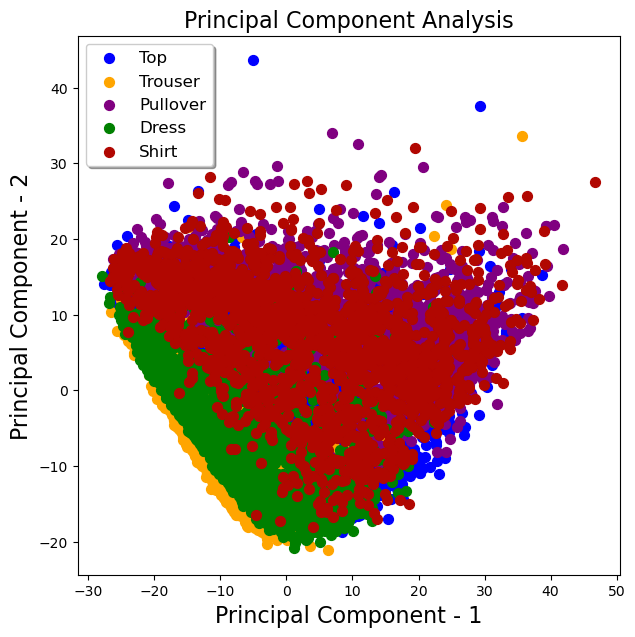

In [19]:
plt.figure()
plt.figure(figsize=(7,7))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Principal Component - 1',fontsize=16)
plt.ylabel('Principal Component - 2',fontsize=16)
plt.title("Principal Component Analysis",fontsize=16)
targets = ['Top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
colors = ['b', 'orange', 'purple', 'g', '#B10701']
for target, color in zip(targets,colors):
    indicesToKeep = train_df.iloc[:,-1] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'PC1']
               , pca_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 12}, shadow = True);

# LDA dimensionality reduction

> Using sklearn library for reference, if our code works properly

In [20]:
y = train_df.iloc[:,-1]
lda = LinearDiscriminantAnalysis()
lda_train = lda.fit_transform(x,y)

In [21]:
labels = ['LD_var_' + str(a) for a in range(1, len(lda_train[0])+1)]
lda_df = pd.DataFrame(lda_train, columns = labels)

In [65]:
lda_df

,LD_var_1,LD_var_2,LD_var_3,LD_var_4
0,-2.566698,0.556999,-1.853492,-1.649051
1,5.200266,-1.052919,-0.304277,0.403187
2,-1.947182,0.489225,-4.088625,-3.024362
3,-0.526337,1.277373,1.239752,0.239821
4,-0.848720,-0.492582,-0.640027,3.518901
...,...,...,...,...
9995,-2.378782,0.590585,-1.133377,0.246795
9996,-1.609139,0.184289,-1.507037,2.201470
9997,-0.220865,3.503316,1.788161,-0.217823
9998,-1.430544,0.892340,-1.819064,-1.694346


<Figure size 640x480 with 0 Axes>

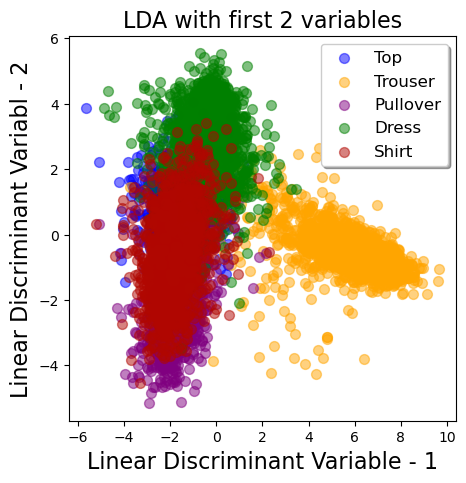

In [23]:
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Linear Discriminant Variable - 1',fontsize=16)
plt.ylabel('Linear Discriminant Variabl - 2',fontsize=16)
plt.title("LDA with first 2 variables",fontsize=16)
targets = ['Top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
colors = ['b', 'orange', 'purple', 'g', '#B10701']
for target, color in zip(targets,colors):
    indicesToKeep = train_df.iloc[:,-1] == target
    plt.scatter(lda_df.loc[indicesToKeep, 'LD_var_1']
               , lda_df.loc[indicesToKeep, 'LD_var_2'], c = color, s = 50, alpha=0.5)

plt.legend(targets,prop={'size': 12}, shadow = True);

/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


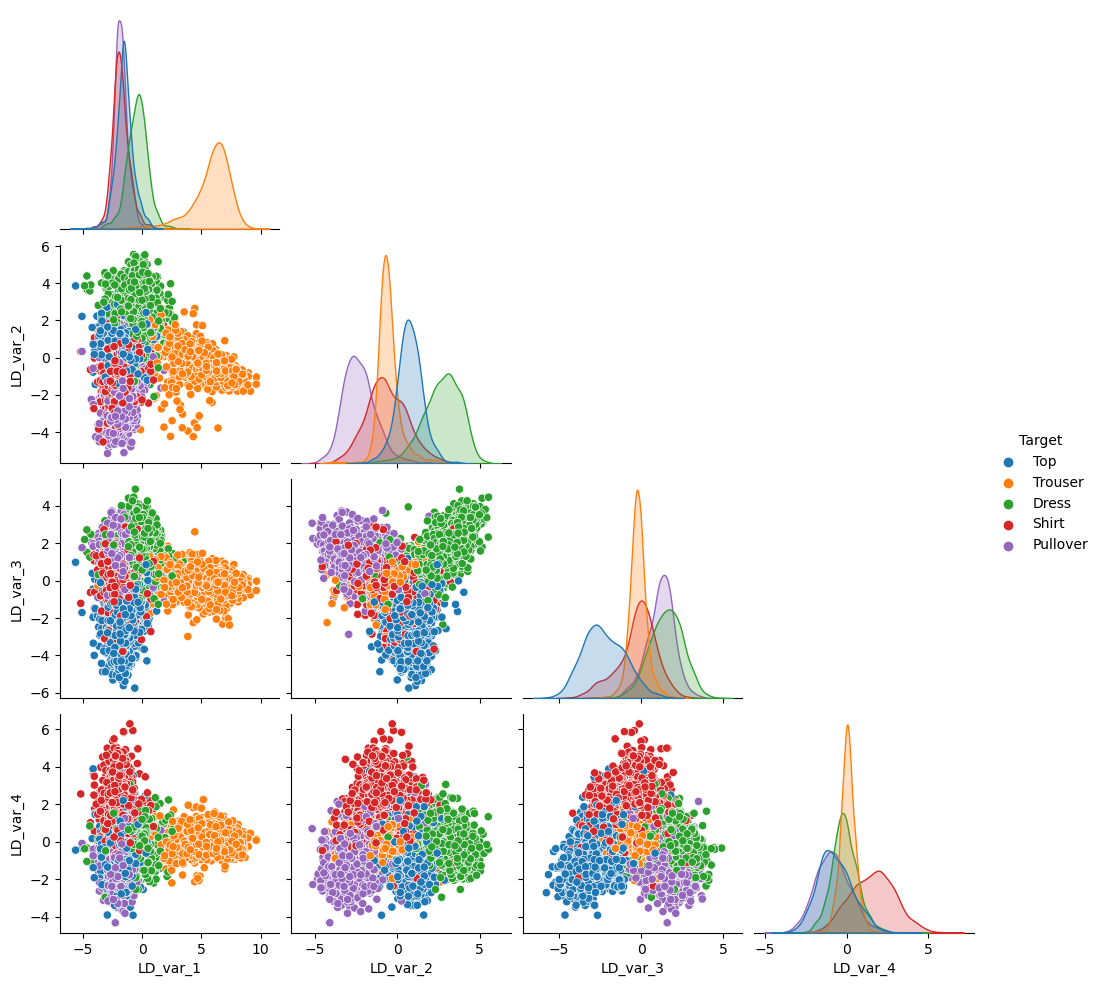

In [24]:
lda_pair = lda_df.copy()
lda_pair['Target'] = y
sns.pairplot(data=lda_pair, hue='Target', corner=True);

> Our own code

In [25]:
# MEAN VECTORS

X = train_data[:,:784]
num_classes = 5
labels = {0:'Top',1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Shirt'}
mean_vectors = []

for i in range(num_classes):
    mean_vectors.append(np.mean(X[y==labels[i]], axis=0))

mean_vectors_array = np.array(mean_vectors)

In [26]:
# WITHIN-CLASS SCATTER

num_features = len(mean_vectors[0])

within_class_scatter = np.zeros((num_features, num_features))
for c,m in zip(range(num_classes), mean_vectors):
    class_scatter = np.zeros((num_features,num_features))
    for x in X[y == labels[c]]:
        x,m = x.reshape(num_features,1), m.reshape(num_features,1)
        class_scatter += (x-m).dot((x-m).T)
    within_class_scatter += class_scatter

within_class_scatter.shape

(784, 784)

In [27]:
# BETWEEN CLASS SCATTER

total_mean = np.mean(X, axis=0)

between_class_scatter = np.zeros((num_features, num_features))

for i,mean_vec in enumerate(mean_vectors):  
    n = X[y== labels[i],:].shape[0]
    mean_vec = mean_vec.reshape(num_features,1) # make column vector
    total_mean = total_mean.reshape(num_features,1) # make column vector
    between_class_scatter += n * (mean_vec - total_mean).dot((mean_vec - total_mean).T)

between_class_scatter.shape

(784, 784)

In [28]:
# GET EIGENVALUES AND EIGENVECTORS

eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

for i in range(len(eigenvalues)):
    eigv = eigenvectors[:,i].reshape(num_features,1)
    #np.testing.assert_array_almost_equal(np.linalg.inv(within_class_scatter).dot(between_class_scatter).dot(eigv), eigenvalues[i] * eigv,decimal=6, err_msg='', verbose=True)

In [40]:
# List of tuples (eigenvalue,eigenvctor)
eigval_eigvec = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigval_eigvec = sorted(eigval_eigvec, key=lambda k: k[0], reverse=True)

total_eigenvalues = sum(eigenvalues)

print('First 4 eigenvalues')
for i in range(4):
    eigval = eigval_eigvec[i][0]
    print(f'Eigenvalue {i+1}: {round(eigval,4)}')

print('\nVariance explained:')
eigv_sum = sum(eigenvalues)
for i,j in enumerate(eigval_eigvec):
    if i<5:
        print('Eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))
    else:
        break

First 4 eigenvalues
Eigenvalue 1: 8.4004
Eigenvalue 2: 2.7822
Eigenvalue 3: 1.8046
Eigenvalue 4: 0.7584

Variance explained:
Eigenvalue 1: 61.11%
Eigenvalue 2: 20.24%
Eigenvalue 3: 13.13%
Eigenvalue 4: 5.52%
Eigenvalue 5: 0.00%


In [30]:
# chosing K eigenvectors
k =  min(num_features,num_classes-1)

# W matrix
k_eigenvectors = [eigval_eigvec[i][1].reshape(-1,1) for i in range(k)]
W = np.hstack(k_eigenvectors)
W.shape

(784, 4)

In [68]:
# LDA
X_LDA = X.dot(W)
labels = ['LD_var_' + str(a) for a in range(1, len(lda_train[0])+1)]
X_LDA = X_LDA.real
X_LDA = pd.DataFrame(X_LDA, columns = labels)

In [69]:
X_LDA

,LD_var_1,LD_var_2,LD_var_3,LD_var_4
0,-3.071881,0.323908,-2.322965,4.665940
1,10.143353,-2.115297,-0.344393,-0.227038
2,-2.017796,0.221223,-5.177552,7.944977
3,0.399727,1.415355,1.627555,0.162462
4,-0.148798,-1.266324,-0.773194,-7.655572
...,...,...,...,...
9995,-2.752149,0.374794,-1.403274,0.145834
9996,-1.442626,-0.240788,-1.880491,-4.514531
9997,0.919477,4.787907,2.327952,1.253584
9998,-1.138752,0.831987,-2.278994,4.773933


<Figure size 640x480 with 0 Axes>

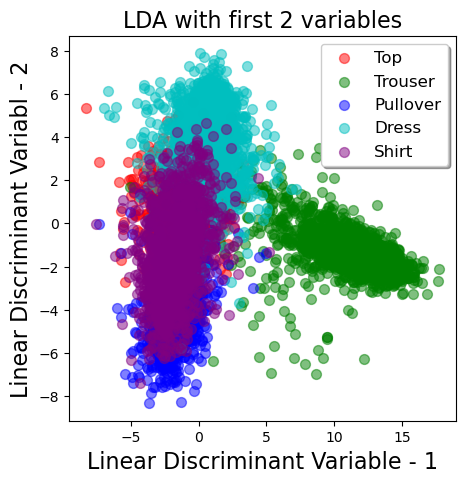

In [70]:
# PLOT FIRST 2 COMPONENTS

plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Linear Discriminant Variable - 1',fontsize=16)
plt.ylabel('Linear Discriminant Variabl - 2',fontsize=16)
plt.title("LDA with first 2 variables",fontsize=16)
targets = ['Top', 'Trouser', 'Pullover', 'Dress', 'Shirt']
colors = ['r', 'g', 'b', 'c', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = train_df.iloc[:,-1] == target
    plt.scatter(X_LDA.loc[indicesToKeep, 'LD_var_1']
               , X_LDA.loc[indicesToKeep, 'LD_var_2'], c = color, s = 50, alpha=0.5)

plt.legend(targets,prop={'size': 12}, shadow = True);

# KNN

#### TRAIN/TEST DATA

In [71]:
# X_train_lda, X_test_lda, y_train, y_test

class_mapping = {'Top':0,'Trouser':1,'Pullover':2,'Dress':3,'Shirt':4}

X_train_lda = X_LDA.copy()
#X_train_lda['Target'] = y
X_train_lda = X_train_lda.values

y_train = y.replace(class_mapping)
y_train = y_train.values
y_train = y_train.reshape(-1,1)

# LDA on TESTdata  

testdata = np.load('fashion_test.npy')
test_df = pd.DataFrame(testdata)

x_t = test_df.loc[:, :783].values
x_t = preprocessing.StandardScaler().fit_transform(x_t)
y_t = test_df.iloc[:,-1]

lda_t = LinearDiscriminantAnalysis()
lda_test = lda_t.fit_transform(x_t,y_t)
labels_t = ['LD_var_' + str(a) for a in range(1, len(lda_test[0])+1)]
lda_t_df = pd.DataFrame(lda_test, columns = labels_t)
X_test_lda = lda_t_df.copy()
X_test_lda = X_test_lda.values

y_test = y_t
y_test = y_test.values
y_test = y_test.reshape(-1,1)

In [ ]:
# NORMALISATION 
# do we need to?? given that is lda...

#### 2 LDA VAR

In [96]:
X_train_2lda = np.delete(X_train_lda, [2,3], axis=1)
X_test_2lda = np.delete(X_test_lda, [2,3], axis=1)

In [ ]:
# CROSS VALIDATION FOR SELECTING K

metrics = {'Accuracy: ': accuracy_score} #F1 SCORE? 
classifiers = { "Knn 1": KNN(1), "Knn 3": KNN(3), "Knn 5": KNN(5), "Knn 10": KNN(10)}


def cross_validate_classifiers(classifiers, X_train, y_train, metrics):
    results = {}

    for clf in classifiers.keys():
        clf_results = {}

        for metric in metrics.keys():
            scores = cross_val_score(classifiers[clf], X_train, y_train, cv=5)
            clf_results[metric] = scores.mean()

        results[clf] = clf_results
    return results

results = cross_validate_classifiers(classifiers,X_train_2lda,y_train, metrics)
resultsdf = pd.DataFrame(results)

In [127]:
resultsdf

,Knn 1,Knn 3,Knn 5,Knn 10
Accuracy:,0.6936,0.7394,0.7538,0.7686


In [150]:
#EVALUATION ON TEST DATA 

k= 10
knn_classifier = KNN(k)
knn_classifier = knn_classifier.fit(X_train_2lda,y_train)

y_pred = knn_classifier.predict(X_test_2lda)
#F1 = round(f1_score(y_test ,y_pred),4)
Accuracy = round(accuracy_score(y_test ,y_pred),4)
print(f'KNN {k} neighbors. Accuracy score: {Accuracy}')

/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN 10 neighbors. Accuracy score: 0.2908


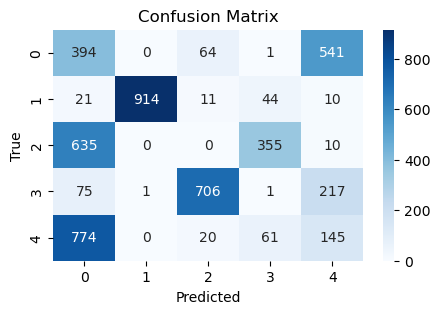

In [152]:
def confusionmatrix(y_test,y_pred):

    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,3)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    return

confusionmatrix(y_test,y_pred)

In [145]:
# DOUBLE CHECK WITH LDA FROM LIBRARY (NOT OUR CODE)

lda2 = lda_df.values
lda2 = np.delete(lda2, [2,3], axis=1)

#EVALUATION ON TEST DATA 

k= 10
knn_classifier_ = KNN(k)
knn_classifier_ = knn_classifier_.fit(lda2,y_train)

y_pred = knn_classifier_.predict(X_test_2lda)
#F1 = round(f1_score(y_test ,y_pred),4)
Accuracy = round(accuracy_score(y_test ,y_pred),4)
print(f'KNN {k} neighbors. Accuracy score: {Accuracy}')

print('Why different accuracy, shouldnt be equal? -- check order of lda?')

/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN 10 neighbors. Accuracy score: 0.2746
Why different accuracy, shouldnt be equal? -- check order of lda?


#### 3 LDA VAR

In [146]:
X_train_3lda = np.delete(X_train_lda, [3], axis=1)
X_test_3lda = np.delete(X_test_lda, [3], axis=1)

In [ ]:
results_3lda = cross_validate_classifiers(classifiers,X_train_3lda,y_train, metrics)
resultsdf_3lda = pd.DataFrame(results_3lda)

In [148]:
resultsdf_3lda

,Knn 1,Knn 3,Knn 5,Knn 10
Accuracy:,0.7632,0.7974,0.8107,0.821


In [153]:
#EVALUATION ON TEST DATA 

k= 10
knn_classifier = KNN(k)
knn_classifier = knn_classifier.fit(X_train_3lda,y_train)

y_pred = knn_classifier.predict(X_test_3lda)
#F1 = round(f1_score(y_test ,y_pred),4)
Accuracy = round(accuracy_score(y_test ,y_pred),4)
print(f'KNN {k} neighbors. Accuracy score: {Accuracy}')

/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN 10 neighbors. Accuracy score: 0.4392


In [ ]:
confusionmatrix(y_test,y_pred)

#### FULL 4 LDA VAR

In [ ]:
results_full = cross_validate_classifiers(classifiers,X_train_lda,y_train, metrics)
resultsdf_full = pd.DataFrame(results_full)

In [156]:
resultsdf_full

,Knn 1,Knn 3,Knn 5,Knn 10
Accuracy:,0.8221,0.853,0.8607,0.8692


In [157]:
#EVALUATION ON TEST DATA 

k= 10
knn_classifier = KNN(k)
knn_classifier = knn_classifier.fit(X_train_lda,y_train)

y_pred = knn_classifier.predict(X_test_lda)
#F1 = round(f1_score(y_test ,y_pred),4)
Accuracy = round(accuracy_score(y_test ,y_pred),4)
print(f'KNN {k} neighbors. Accuracy score: {Accuracy}')

/Users/florentinafabregas/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN 10 neighbors. Accuracy score: 0.2944


In [ ]:
confusionmatrix(y_test,y_pred)

# CNN

In [163]:
# import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
from tensorflow.keras import datasets, layers, models
# from tensorflow.keras import placeholder
import matplotlib.pyplot as plt

2023-12-21 16:58:02.988200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
x_train = train_df.loc[:, :783].values #train_images
y_train = train_df.iloc[:,-1] #train_labels

x_test = test_df.loc[:, :783].values #test_images
y_test = test_df.iloc[:,-1] #test_labels

In [ ]:
# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# y_test = y_test.reshape((y_test.shape[0], 28, 28, 1))


x_train = np.array(x_train).reshape((x_train.shape[0], 28, 28, 1))
x_test = np.array(x_test).reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
# Normalizing pixel values to be between 0 and 1
# train_data already normalised

x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# define cnn model

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())


In [ ]:
model.summary()

What can we see?

- Output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels)

- width and height dimensions show tendency of getting smaller as you go deeper in the network

In [ ]:
# classificationnn -> we use fully connected layer (FN/dense layer) 
model.add(layers.Flatten()) #falttening the image 
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(5))

In [ ]:
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.01, momentum=0.9)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

The network summary shows that (3, 3, 56) outputs were flattened into vectors of shape (504) before going through two Dense layers.

### Compiling and training the model

In [ ]:
# import pandas as pd

# # Assuming your DataFrame columns contain labels like 'Top', 'Trouser', etc.
# label_map = {'Top': 0.0, 'Trouser': 1.0, 'Pullover': 2.0, 'Dress': 3.0, 'Shirt': 4.0}

# test_df = pd.DataFrame(test_data)
# test_df.iloc[:, -1].replace(label_map, inplace=True)


In [ ]:
#softmax activation function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(train_data, epochs=10, 
#                     validation_data=(test_data))

In [ ]:
#model evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
print(test_acc)

## CNN from scratch

In [ ]:
training_iters = 10
learning_rate = 0.001
batch_size = 128

In [ ]:
n_input = 28
n_classes = 5

In [ ]:
# x is the input placeholder, rebuilding the image into 28x28x1 matrix
x = tf.placeholder("float", [None, 28,28,1])
# y is the label set, using the number of classes
y = tf.placeholder("float", [None, n_classes])

In [ ]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

# creating a 2D max-pool layer. Parameters : test images x, and k = the kernel/filter size.

def maxpool2d(x, k=2):

    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')


# weights and biases defined by hand
# weights = {
#     'wc1': tf.Variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),
#     'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()),
#     'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),
#     'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()),
#     'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()),
# }
# biases = {
#     'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
#     'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
#     'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
#     'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
#     'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
# }

In [ ]:
def conv_net(x, weights, biases):  
   conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)


   conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)

    fc1 = tf.reshape(conv3, 
                     [-1, 
                     weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])

    # In this last part, applying the Relu function and making matrix multiplication on the weights

    fc1 = tf.nn.relu(fc1)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [ ]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

#Finally, we’ll define the Adam optimizer with a learning rate of 0.001 as defined in the model hyperparameters above:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [ ]:
init = tf.global_variables_initializer()
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Naive Bayes

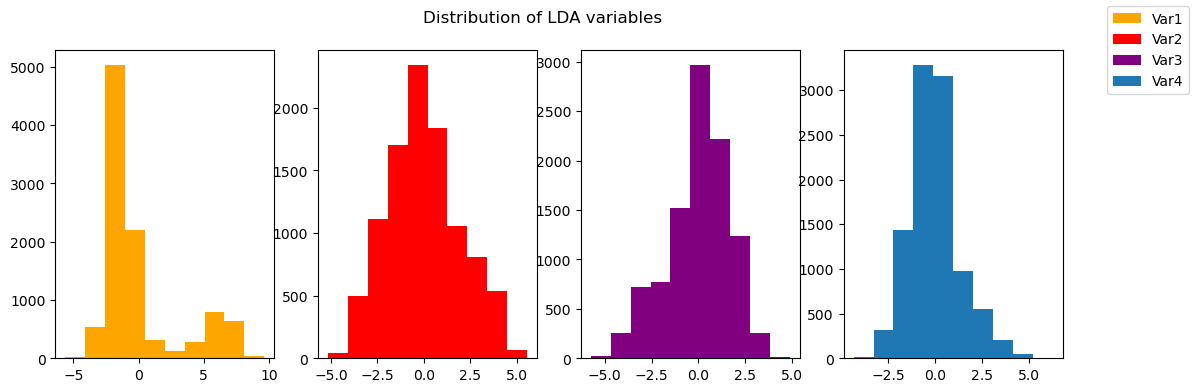

In [25]:
fig, ax = plt.subplots(nrows=1,ncols =4, figsize = (13,4))

ax[0].hist(lda_pair.iloc[:,0], color = 'orange', label = 'Var1')
ax[1].hist(lda_pair.iloc[:,1], color = 'red', label = 'Var2')
ax[2].hist(lda_pair.iloc[:,2], color = 'purple', label='Var3')
ax[3].hist(lda_pair.iloc[:,3], label = 'Var4')
fig.legend()
fig.suptitle('Distribution of LDA variables');

In [26]:
#LDA on test

test_data = np.load('fashion_test.npy')
test_df = pd.DataFrame(test_data)
# train_df.iloc[:,-1]
test_df.iloc[:,-1].replace(0, 'Top',inplace=True)
test_df.iloc[:,-1].replace(1, 'Trouser',inplace=True)
test_df.iloc[:,-1].replace(2, 'Pullover',inplace=True)
test_df.iloc[:,-1].replace(3, 'Dress',inplace=True)
test_df.iloc[:,-1].replace(4, 'Shirt',inplace=True)

x_t = test_df.loc[:, :783].values
x_t = preprocessing.StandardScaler().fit_transform(x_t)
y_t = test_df.iloc[:,-1]
lda_t = LinearDiscriminantAnalysis()
lda_test = lda_t.fit_transform(x_t,y_t)
labels_t = ['LD_var_' + str(a) for a in range(1, len(lda_test[0])+1)]
lda_t_df = pd.DataFrame(lda_test, columns = labels_t)
lda_pair_test = lda_t_df.copy()
lda_pair_test['Target'] = y_t

In [27]:
def class_divider(data):
    targets = list(data['Target'].unique())
    classes = {}

    for t in targets:
        classes[t] = data[(data['Target']==t)]
    return classes

In [31]:
def prior_probabilities(data):
    prior = data['Target'].value_counts()
    targets = list(data['Target'].unique())
    prior_p = {}

    for i,t in enumerate(targets):
        prior_p[t] = prior[i]/len(data['Target'])
    
    return prior_p
    

In [159]:
def summary(classes):
    classes_sum = {} #mean and std for each lda_var(column)

    for t in targets:
        classes_sum[t] = []
        for v in range(len(classes)-1):
            v = [classes[t].iloc[:,v].mean(), classes[t].iloc[:,v].std()]
            classes_sum[t].append(v)
    return classes_sum

In [33]:
# Calculate the Gaussian probability distribution function for x

def calculate_probability(x, mean, stdev):
    exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [160]:
def conditional_prob(data_df, feature, x):
    var = data_df.iloc[:,feature]
    bin_count = 50
    plt.hist(var, bins=bin_count)

    hist, bin_edges = np.histogram(var, bins=bin_count)

    x_value = x #example
    bin_index= np.digitize(x_value, bin_edges)

    count_at_x = hist[bin_index - 1] 

    bin_widths = np.diff(bin_edges)
    width_at_x = bin_widths[bin_index - 1] 
    nh = width_at_x* len(var)

    #print('Num of observation in bin containing x:', count_at_x)
    #print('nh: ', nh)
    #print('pdf f(x) - Conditional probability: ', count_at_x/nh)

    return count_at_x/nh

In [ ]:
def class_p(row, summaries, prior_probs):
    probs = {}
    prior_p = prior_probs

    for c in summaries.keys():
        probs[c] = math.log(prior_p[c])
        for v in range(len(row)-1):
            mean, sd = summaries[c][v]
            probs[c] += math.log(calculate_probability(row[v], mean, sd))
    
    prediction = max(probs, key=probs.get)
    
    return prediction

In [ ]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [ ]:
def NaiveBayes(train_data, test_data):
    predicted = []
    classes = class_divider(train_data)
    prior_p = prior_probabilities(train_data)
    classes_sum = summary(classes)
    for _,row in test_data.iterrows():
        prediction = class_p(row, classes_sum, prior_p)
        predicted.append(prediction)
    return predicted

In [ ]:
prediction = NaiveBayes(lda_pair, lda_pair_test)

print(f'Accuracy of Naive Bayes model: {accuracy_metric(y_t, prediction)}%')

### Different pdf

In [161]:
#LDA on test
test_data = np.load('fashion_test.npy')
test_df = pd.DataFrame(test_data)
# train_df.iloc[:,-1]
test_df.iloc[:,-1].replace(0, 'Top',inplace=True)
test_df.iloc[:,-1].replace(1, 'Trouser',inplace=True)
test_df.iloc[:,-1].replace(2, 'Pullover',inplace=True)
test_df.iloc[:,-1].replace(3, 'Dress',inplace=True)
test_df.iloc[:,-1].replace(4, 'Shirt',inplace=True)

x_t = test_df.loc[:, :783].values
x_t = preprocessing.StandardScaler().fit_transform(x_t)
y_t = test_df.iloc[:,-1]
lda_t = LinearDiscriminantAnalysis()
lda_test = lda_t.fit_transform(x_t,y_t)
labels_t = ['LD_var_' + str(a) for a in range(1, len(lda_test[0])+1)]
lda_t_df = pd.DataFrame(lda_test, columns = labels_t)
lda_pair_test = lda_t_df.copy()
lda_pair_test['Target'] = y_t

In [ ]:
def class_divider(data):
    targets = list(data['Target'].unique())
    classes = {}

    for t in targets:
        classes[t] = data[(data['Target']==t)]

    return classes

In [ ]:
def prior_probabilities(data):
    prior = data['Target'].value_counts()
    targets = list(data['Target'].unique())
    prior_p = {}

    for i,t in enumerate(targets):
        prior_p[t] = prior[i]/len(data['Target'])
    
    return prior_p
    

In [ ]:
def summary(classes):
    #should return pdf and bin_edges for each class
    classes_pdf = {}

    for t in classes.keys():
        for v in range(classes[t].shape[1]-1):
            np_data = np.array(classes[t].iloc[:,v])
            min_value = np.min(np_data)
            max_value = np.max(np_data)
            h = 0.2
            bin_edges = np.arange(min_value, 40, h)
            counts, bin_edges = np.histogram(np_data, bins=bin_edges)
            adjusted_counts = counts + 0.0001 #so when it's 0, it doesn't mess up the multiplication in class_p()
            n = sum(counts)
            normalized_counts = adjusted_counts / (n * h)
            classes_pdf[t] = [normalized_counts, bin_edges]
    return classes_pdf

In [ ]:
def calculate_probability(x, pdf):
    normalized_counts, bin_edges = pdf[0], pdf[1]
    #calculating probability
    index = np.searchsorted(bin_edges[:-1], x)
    pdf_output = normalized_counts[index]
    return pdf_output


In [ ]:
def class_p(row, summaries, prior_probs):
    probs = {}
    prior_p = prior_probs

    for t in targets:
        probs[t] = prior_p[t]
        for v in range(len(row)-1):
            pdf = summaries[t]
            probs[t] *= calculate_probability(row[v], pdf)
    
    prediction = max(probs, key=probs.get)
    
    return prediction

In [ ]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [ ]:
def NaiveBayes(train_data, test_data):
    predicted = []
    classes = class_divider(train_data)
    prior_p = prior_probabilities(train_data)
    classes_sum = summary(classes)
    for _,row in test_data.iterrows():
        prediction = class_p(row, classes_sum, prior_p)
        predicted.append(prediction)
    return predicted

In [ ]:
final_train = lda_pair[['LD_var_1', 'LD_var_2', 'Target']]
final_test = lda_pair_test[['LD_var_1', 'LD_var_2', 'Target']]

In [ ]:
prediction = NaiveBayes(final_train, final_test)

print(accuracy_metric(y_t, prediction))

### Class distribution plot

train_df = pd.DataFrame(train_data)
train_df.iloc[:,-1]
train_df.iloc[:,-1].replace(0, 'Top',inplace=True)
train_df.iloc[:,-1].replace(1, 'Trouser',inplace=True)
train_df.iloc[:,-1].replace(2, 'Pullover',inplace=True)
train_df.iloc[:,-1].replace(3, 'Dress',inplace=True)
train_df.iloc[:,-1].replace(4, 'Shirt',inplace=True)


In [ ]:
test_df = pd.DataFrame(test_data)
test_df.iloc[:,-1]
test_df.iloc[:,-1].replace(0, 'Top',inplace=True)
test_df.iloc[:,-1].replace(1, 'Trouser',inplace=True)
test_df.iloc[:,-1].replace(2, 'Pullover',inplace=True)
test_df.iloc[:,-1].replace(3, 'Dress',inplace=True)
test_df.iloc[:,-1].replace(4, 'Shirt',inplace=True)


In [ ]:
# Unique classes and their counts
# in test set
unique_test, counts_test = np.unique(test_df.iloc[:,-1], return_counts=True)
# in train set
unique_train, counts_train = np.unique(train_df.iloc[:,-1], return_counts=True)
print("Unique classes and their counts:", dict(zip(unique_train, counts_train)))
print("Unique classes and their counts:", dict(zip(unique_test, counts_test)))

In [ ]:
# Create the first subplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(unique_train, counts_train)
plt.xticks(unique_train)
plt.xlabel("Type of clothing")
plt.ylabel("Frequency")
plt.title("Distribution of categories in train dataset")
 
# Create the second subplot
plt.subplot(1, 2, 2)
plt.bar(unique_test, counts_test)
plt.xticks(unique_test)
plt.xlabel("Type of clothing")
# plt.ylabel("Frequency")
plt.title("Distribution of categories in test dataset")
plt.show()
 
# Display the plot
plt.show